<a href="https://colab.research.google.com/github/MrunaliShigawan/MnistClassifier/blob/master/Mnist_classification_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 32s 537us/step - loss: 0.1937 - accuracy: 0.9408 - val_loss: 0.0496 - val_accuracy: 0.9847
Epoch 2/7
60000/60000 [==============================] - 32s 529us/step - loss: 0.0577 - accuracy: 0.9815 - val_loss: 0.0365 - val_accuracy: 0.9899
Epoch 3/7
60000/60000 [==============================] - 32s 529us/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0301 - val_accuracy: 0.9897
Epoch 4/7
60000/60000 [==============================] - 32s 529us/step - loss: 0.0327 - accuracy: 0.9892 - val_loss: 0.0263 - val_accuracy: 0.9911
Epoch 5/7
60000/60000 [==============================] - 32s 528us/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0262 - val_accuracy: 0.9911
Epoch 6/7
60000/60000 [==============================] - 32s 529us/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0229 - val_accuracy: 0.99

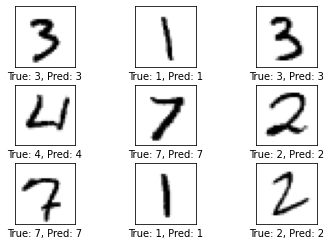

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape([-1,28,28,1]).astype('float32')
x_test=x_test.reshape([-1,28,28,1]).astype('float32')

x_train=x_train/225
x_test=x_test/255

y_train_true=y_train
y_test_true=y_test

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

model=Sequential()

model.add(Conv2D(16, (5,5), input_shape=(x_train.shape[1:]), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(36, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',  optimizer=Adam(), metrics=['accuracy'])
weights_path = "modelmnist.h5"
model_checkpoint = ModelCheckpoint(weights_path, monitor='val_loss', save_best_only=True)

model.fit(x_train, y_train, epochs=7, callbacks=[model_checkpoint],validation_data=(x_test, y_test), batch_size=64)
model.save('MnistKeras.h5')

prediction=model.predict(x_test[30:39])

y_pred_cls = np.argmax(prediction, axis=1)

img_size=28
img_shape = (img_size, img_size)
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        
        ax.set_xlabel(xlabel)
        
       
        ax.set_xticks([])
        ax.set_yticks([])
    
    
    plt.show()

plot_images(x_test[30:39],y_test_true[30:39],y_pred_cls[0:9])